In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [39]:
class hysterese:
    def __init__(self,path) -> None:
        data=np.genfromtxt(path).T
        self.I=data[0]
        self.B=data[1]
        self.phi=data[2]
        pass
    def get_points(self),
        
    def plot(self):
        fig = plt.figure(figsize=(7, 5))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        # fig1.set_title(f"Laser")
        fig1.set_ylabel("Kerr Winkel in $^°$")
        fig1.set_xlabel("B in mT")
        # fig1.set_xlim(-5,185)
        # fig1.set_ylim(0,9.5)
        plt.tight_layout()
        plt.plot(self.B,self.phi)
        # plt.savefig(f"plots/{title}.pdf")
        plt.show()


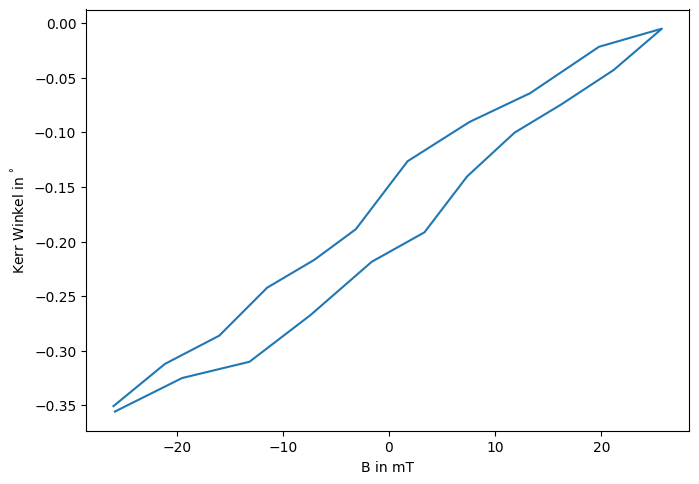

In [40]:
hyst1=hysterese("data/hysterese/2.dat")
hyst1.plot()